PS: Analyse the data and get the insights to open a new restaurent in Banglore

1) sutaible location 
2) what is range of the cost2plate
3) shall I have online orders and booking table
4) which type of cusinen
5) which type of restaurent we an start

## Importing required libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #basic viz lib
import seaborn as sns    #advanced data viz lib
plt.style.use('dark_background')

## Loading the given data 

In [142]:
df = pd.read_csv('zomato.csv/zomato.csv')
# creating copy for backup
g = df.copy()

In [143]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [144]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [24]:
df.loc[5159]

url                            https://www.zomato.com/bangalore/the-mughals-f...
address                        86, MM Road, Pulikeshi Nagar, Frazer Town, Ban...
name                                                                The Mughal's
online_order                                                                 Yes
book_table                                                                    No
rate                                                                       3.7/5
votes                                                                         89
phone                                                             +91 8884497867
location                                                             Frazer Town
rest_type                                                            Quick Bites
dish_liked                                   Chicken Biryani, Lemon Chicken Roll
cuisines                                          Mughlai, North Indian, Chinese
approx_cost(for two people) 

## Data Wrangling process

In [145]:
df.shape

(51717, 17)

In [146]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

This data consists of 16 columns, 51717 rows. 
Analysis from this outputin order to create a dashboard:
1. no need of columns like, URL, phone, location (as listed in city is same column with all values present), reviwe list, menue items.
2. Fill null values in rate column and correct its data type.
3. fill vales for dishesh liked
4. change the data type of cost for two people

In [148]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [149]:
df = df.drop(columns = ['url', 'address', 'phone', 'menu_item', 'dish_liked', 
              'reviews_list','location',])
df.head()  # write this in new cell

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


I fell doubt that rest in type and listed in type have diffferent data. So lets check the columns by unique values

In [150]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [152]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [153]:
df = df.drop(columns = "rest_type" )
df

,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500",Pubs and bars,Whitefield


In [154]:
# check the new shape of data
df.shape

(51717, 9)

## Checking Duplicates

In [155]:
# if dupplicates are present in your data
if df.duplicated().sum() >0:
    print(df.duplicated().sum(), "duplictaes")
    df.drop_duplicates(inplace = True)
    print("duplictaes has dropped")
else:
    print("No duplicates found")

140 duplictaes
duplictaes has dropped


In [156]:
#df.drop_duplicates(inplace = True)
df.shape

(51577, 9)

The shape of the data is update.

From 51717 rows to 51577 rows 

and from 17 columns to 9 columns.

Since some rows have been deleted, that means the index numbers might have been mismatch, lets check from .tail()

In [39]:
df.tail()

,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4 /5,13,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


As per data index no is 51716 but it should be 51577. 
So reseting the index vakues for convenient.

In [157]:
df.reset_index(inplace=True)

In [158]:
df.tail()

,index,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
51572,51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500",Pubs and bars,Whitefield
51573,51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600,Pubs and bars,Whitefield
51574,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,"2,000",Pubs and bars,Whitefield
51575,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500",Pubs and bars,Whitefield
51576,51716,The Nest - The Den Bengaluru,No,No,3.4 /5,13,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


## Exploring and cleaning all columns first
find missing values

In [42]:
df.isnull().sum()

index                             0
name                              0
online_order                      0
book_table                        0
rate                           7724
votes                             0
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [160]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [161]:
df["name"].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Vivi's Food Joint                                           1
CHAATter Box                                                1
Bake Delite                                                 1
Mother's Rasoi Family Restaurant                            1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64

In [49]:
df.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df.online_order.value_counts()

online_order
Yes    30333
No     21244
Name: count, dtype: int64

In [51]:
df.columns

Index(['index', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [52]:
df.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [53]:
df.book_table.value_counts()

book_table
No     45161
Yes     6416
Name: count, dtype: int64

In [54]:
df.columns

Index(['index', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

## Cleaning Rate Column

In [55]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [162]:
#Explaination
name = "2.2/5"
a= name.split("/")
print(a)
name = float(a[0])
name

['2.2', '5']


2.2

From the above data we see there are few string values. Also the vales are not in required format.
Now let us remove string, hyphen, garbage values and extract only the numerator part of the data.

Since this rating is out of 5 which is common for all. By this critria I can decide to change the format and keep only float values.

## Removing garbage values and extracting numerator part of fraction from Rate Column

1) We create a function to check if the value is NEW or "-" using if-else statement.

2) If the value is string then replace that with null value 

3) If the value is number then convert it to string format and extract required part using split function.
As the output saved is in list format, so we will take only the first part of the list using indexing methodoloy

4) Converting that to float and returing it to the function

5) using apply function execute the given conditions in the dataset

In [163]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [164]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    


In [165]:
df['rate'] = df['rate'].apply(handlerate)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [166]:
df['rate'].isnull().sum()
#there are around 9987 null values filling those vales

9987

In [65]:
# pivot table
pd.pivot_table(data=df,index="online_order",columns = "book_table", values= "rate")

book_table,No,Yes
online_order,,
No,3.551307,4.160488
Yes,3.657029,4.131521


## Filling Null Values in Rate Column with Mean

In [191]:
df["rate"].median()

3.7

# to fill the lumpsum values 
df['rate'].fillna(3.7, inplace = True)
df['rate'].isnull().sum()

In [193]:
book_yes = df[(df["book_table"]=="Yes")&(df['rate'].isna())].index
book_yes

Index([  553,  1696,  1697,  2237,  2238,  2256,  2259,  2460,  2461,  2479,
       ...
       41002, 42018, 42368, 43372, 44931, 45961, 46004, 48296, 49248, 51006],
      dtype='int64', length=141)

In [194]:
for i in book_yes:
    df.at[i,"rate"] = 4.1

In [195]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [196]:
book_no = df[(df["book_table"]=="No")&(df['rate'].isna())].index
book_no

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51496, 51498, 51499, 51502, 51503, 51504, 51535, 51570, 51573, 51574],
      dtype='int64', length=9846)

In [197]:
for i in book_no:
    df.at[i,"rate"] = 3.5
    #print(df.at[i,"rate"])

In [198]:
df.isnull().sum()

index                            0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [209]:
df.votes.unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [200]:
df["votes"].value_counts()

votes
0       9962
4       1136
6        989
7        871
9        738
        ... 
3673       1
1862       1
3909       1
2155       1
843        1
Name: count, Length: 2328, dtype: int64

In [221]:
#removing outliers
df = df[df["votes"]>0]

In [225]:
df.votes.value_counts()

votes
4       1136
6        989
7        871
9        738
11       699
        ... 
3673       1
1862       1
3909       1
2155       1
843        1
Name: count, Length: 2327, dtype: int64

In [226]:
df.columns

Index(['index', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [227]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [228]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      2601
Koramangala 7th Block    2389
Koramangala 4th Block    2279
Koramangala 5th Block    2275
Koramangala 6th Block    2143
Jayanagar                1951
JP Nagar                 1648
Indiranagar              1553
MG Road                  1527
Church Street            1501
Brigade Road             1483
Lavelle Road             1456
Residency Road           1357
HSR                      1339
Marathahalli             1312
Bannerghatta Road        1216
Whitefield               1213
Old Airport Road         1205
Brookefield              1150
Basavanagudi             1072
Sarjapur Road            1038
Kammanahalli             1031
Kalyan Nagar             1002
Bellandur                 967
Frazer Town               957
Malleshwaram              947
Rajajinagar               878
Electronic City           826
Banashankari              727
New BEL Road              572
Name: count, dtype: int64

In [229]:
df['listed_in(city)'].isnull().sum()

0

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41615 entries, 0 to 51576
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        41615 non-null  int64  
 1   name                         41615 non-null  object 
 2   online_order                 41615 non-null  object 
 3   book_table                   41615 non-null  object 
 4   rate                         41615 non-null  float64
 5   votes                        41615 non-null  int64  
 6   cuisines                     41604 non-null  object 
 7   approx_cost(for two people)  41367 non-null  object 
 8   listed_in(type)              41615 non-null  object 
 9   listed_in(city)              41615 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [96]:
df.isnull().sum()

index                            0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [97]:
df.head()

,index,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,0,Jalsa,Yes,Yes,4.1,775.0,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787.0,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918.0,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88.0,"South Indian, North Indian",300,Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166.0,"North Indian, Rajasthani",600,Buffet,Banashankari


In [98]:
df.dropna(inplace = True)
df.shape

(51214, 10)

In [99]:
df.reset_index(inplace=True)
df.tail()

,level_0,index,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
51209,51572,51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27.0,Continental,"1,500",Pubs and bars,Whitefield
51210,51573,51713,Vinod Bar And Restaurant,No,No,3.7,9.0,Finger Food,600,Pubs and bars,Whitefield
51211,51574,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,9.0,Finger Food,"2,000",Pubs and bars,Whitefield
51212,51575,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236.0,Finger Food,"2,500",Pubs and bars,Whitefield
51213,51576,51716,The Nest - The Den Bengaluru,No,No,3.4,13.0,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


In [100]:
df.columns

Index(['level_0', 'index', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [101]:
df['listed_in(type)'].isnull().sum()

0

In [102]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [103]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25670
Dine-out              17638
Desserts               3564
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

In [104]:
df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [105]:
df_cuisines = df['cuisines'].str.split(',', expand=True)
df_cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51214 entries, 0 to 51213
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       51214 non-null  object
 1   1       38984 non-null  object
 2   2       21199 non-null  object
 3   3       9095 non-null   object
 4   4       3261 non-null   object
 5   5       1238 non-null   object
 6   6       560 non-null    object
 7   7       190 non-null    object
dtypes: object(8)
memory usage: 3.1+ MB


In [106]:
df.cuisines.value_counts()

cuisines
North Indian                                2861
North Indian, Chinese                       2373
South Indian                                1820
Biryani                                      910
Bakery, Desserts                             902
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2715, dtype: int64

In [107]:
df.columns

Index(['level_0', 'index', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

## Dropping Null Values

In [108]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'rest','listed_in(city)':'location'}, inplace = True)
df.head()

,level_0,index,name,online_order,book_table,rate,votes,cuisines,Cost2plates,rest,location
0,0,0,Jalsa,Yes,Yes,4.1,775.0,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,1,Spice Elephant,Yes,No,4.1,787.0,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,2,2,San Churro Cafe,Yes,No,3.8,918.0,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,3,3,Addhuri Udupi Bhojana,No,No,3.7,88.0,"South Indian, North Indian",300,Buffet,Banashankari
4,4,4,Grand Village,No,No,3.8,166.0,"North Indian, Rajasthani",600,Buffet,Banashankari


In [109]:
df.tail()

,level_0,index,name,online_order,book_table,rate,votes,cuisines,Cost2plates,rest,location
51209,51572,51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27.0,Continental,"1,500",Pubs and bars,Whitefield
51210,51573,51713,Vinod Bar And Restaurant,No,No,3.7,9.0,Finger Food,600,Pubs and bars,Whitefield
51211,51574,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,9.0,Finger Food,"2,000",Pubs and bars,Whitefield
51212,51575,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236.0,Finger Food,"2,500",Pubs and bars,Whitefield
51213,51576,51716,The Nest - The Den Bengaluru,No,No,3.4,13.0,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


In [110]:
df.shape

(51214, 11)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51214 entries, 0 to 51213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       51214 non-null  int64  
 1   index         51214 non-null  int64  
 2   name          51214 non-null  object 
 3   online_order  51214 non-null  object 
 4   book_table    51214 non-null  object 
 5   rate          51214 non-null  float64
 6   votes         51214 non-null  float64
 7   cuisines      51214 non-null  object 
 8   Cost2plates   51214 non-null  object 
 9   rest          51214 non-null  object 
 10  location      51214 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [112]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [113]:
df.Cost2plates.isnull().sum()

0

## Removing commas from Cost2Plates Column

In [114]:
def handlecost2plate(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecost2plate)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [115]:
df['Cost2plates'].value_counts()

Cost2plates
300.0     7547
400.0     6537
500.0     4969
200.0     4827
600.0     3708
          ... 
60.0         1
5000.0       1
3700.0       1
469.0        1
160.0        1
Name: count, Length: 70, dtype: int64

In [116]:
df.Cost2plates.isnull().sum()

0

In [117]:
df[df.Cost2plates.isnull()]

,level_0,index,name,online_order,book_table,rate,votes,cuisines,Cost2plates,rest,location


In [118]:
df.dropna(inplace=True)
df.shape

(51214, 11)

In [119]:
df.columns

Index(['level_0', 'index', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'cuisines', 'Cost2plates', 'rest', 'location'],
      dtype='object')

In [121]:
df.rest.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [122]:
df.rest.value_counts()

rest
Delivery              25670
Dine-out              17638
Desserts               3564
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

In [ ]:
df.columns

## Cleaning Location Column

In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df['location'].value_counts()

In [ ]:
location = df['location'].value_counts(ascending  = False)
location.tail()

In [ ]:
location_lessthan1000 = location[location<1000]
len(location_lessthan1000)

In [ ]:
def handle_location(value):
    if(value in location_lessthan1000):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

## Cleaning Cuisines Column

In [ ]:
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_lessthan100 = cuisines[cuisines<10]
cuisines_lessthan100

In [ ]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

In [ ]:
df.columns

In [ ]:
df['rest'].value_counts()

In [ ]:
rest_type = df['rest'].value_counts(ascending  = False)
rest_type_lessthan100 = rest_type[rest_type<1000]
len(rest_type_lessthan100)

## Findining outliers

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (6,2))
#sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.hist(x ='rate', data = df,histtype = "step")
plt.show()

In [ ]:
df = df[df["rate"]>2.8]

In [ ]:
df = df[df["rate"]<4.3]

In [ ]:
plt.figure(figsize = (6,2))8
#sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.hist(x ='rate', data = df,histtype = "step")
plt.show()

In [ ]:
df["rate"].median()

In [ ]:

df.columns

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df,histtype = "step")
plt.show()

In [ ]:
df = df[df["votes"]<5000]

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df,histtype = "step")
plt.show()

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df[df["votes"]>2000],histtype = "step")
plt.show()

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df[df["votes"]<2000],histtype = "step")
plt.show()

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df[df["votes"]>200],histtype = "step")
plt.show()

In [ ]:
df = df[df["votes"]<2000]

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df,histtype = "step")
plt.show()

In [ ]:
df = df[df["votes"]>200]

In [ ]:
plt.figure(figsize = (6,2))
plt.hist(x ='votes', data = df,histtype = "step")
plt.show()

In [ ]:
df.votes.median()

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (6,2))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'location', y = 'rate', data = df)
plt.xticks(rotation=90)

In [ ]:
df.columns

In [ ]:
# choose for histogram
plt.figure(figsize = (12,4))
sns.boxplot(x = 'location', y = 'Cost2plates', data = df)
plt.xticks(rotation=90)

In [ ]:
df.columns

In [ ]:
df.drop(df[df.rate < 3.5].index, inplace=True)


In [ ]:
#df.drop(columns = "level_0", inplace=True)
df.reset_index(inplace=True)
df.shape

In [ ]:
df.rate.value_counts()

In [ ]:
plt.hist(x="votes", data=df, histtype="step",range=(df["votes"].min(),df["votes"].max()))
plt.show()

In [ ]:
df.drop(df[df.votes>5000].index, inplace=True)
df.drop(columns = "level_0", inplace=True)
df.reset_index(inplace=True)
df.shape

In [ ]:
plt.hist(x="votes", data=df, histtype="step",range=(df["votes"].min(),df["votes"].max()))
plt.show()

In [ ]:
df.drop(df[df.votes>1000].index, inplace=True)
df.drop(columns = "level_0", inplace=True)
df.reset_index(inplace=True)
df.shape

In [ ]:
plt.hist(x="votes", data=df, histtype="step",range=(df["votes"].min(),df["votes"].max()))
plt.show()

In [ ]:
plt.hist(x="Cost2plates", data=df, histtype="bar",range=(df["Cost2plates"].min(),df["Cost2plates"].max()))
plt.show()

In [ ]:
df.drop(df[df.Cost2plates>2000].index, inplace=True)
df.drop(columns = "level_0", inplace=True)
df.reset_index(inplace=True)
df.shape

In [ ]:
plt.hist(x="Cost2plates", data=df, histtype="bar",range=(df["Cost2plates"].min(),df["Cost2plates"].max()))
plt.show()

In [ ]:
df.info()

In [ ]:
df.drop(columns = ["level_0"], axis = 1, inplace=True)

In [124]:
df.corr(numeric_only = "float")

,level_0,index,rate,votes,Cost2plates
level_0,1.000000,1.000000,0.021444,0.027038,0.054926
index,1.000000,1.000000,0.021462,0.027040,0.054915
rate,0.021444,0.021462,1.000000,0.428902,0.368326
votes,0.027038,0.027040,0.428902,1.000000,0.380980
Cost2plates,0.054926,0.054915,0.368326,0.380980,1.000000


<Axes: >

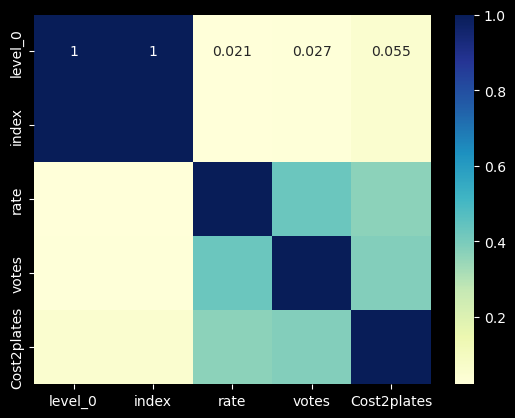

In [123]:

sns.heatmap(df.corr(numeric_only="float"), cmap="YlGnBu", annot=True)

In [ ]:
plt.figure(figsize=(1,1))
sns.pairplot(df,hue="online_order", palette="cool")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [126]:
df.columns

Index(['level_0', 'index', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'cuisines', 'Cost2plates', 'rest', 'location'],
      dtype='object')

Text(0.5, 0, 'Number of outlets')

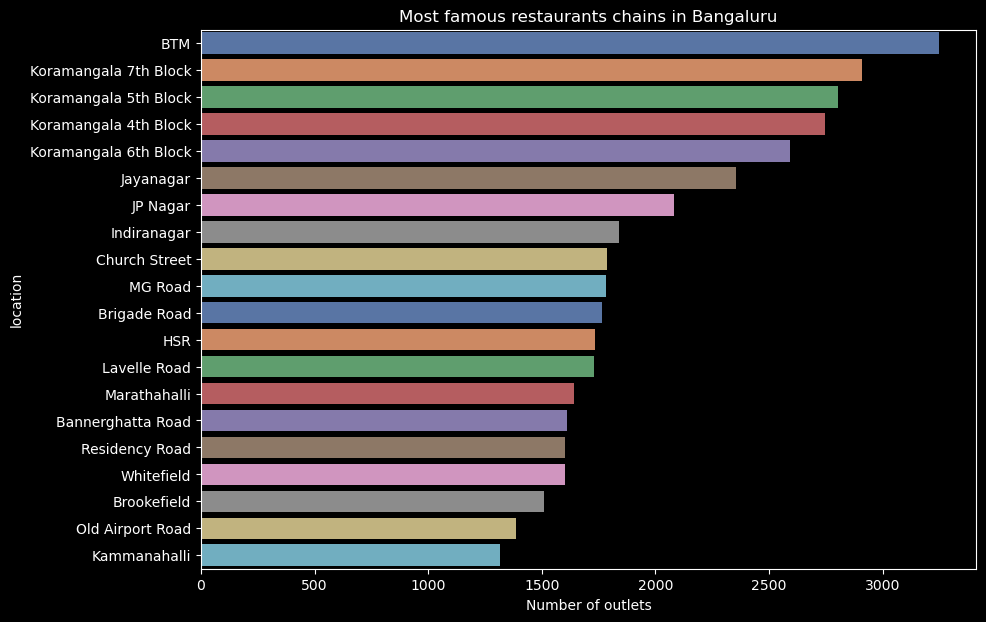

In [127]:
#Top restaurant chains in Bengalore
plt.figure(figsize=(10,7))
chains=df['location'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

Text(0.5, 0, 'Number of outlets')

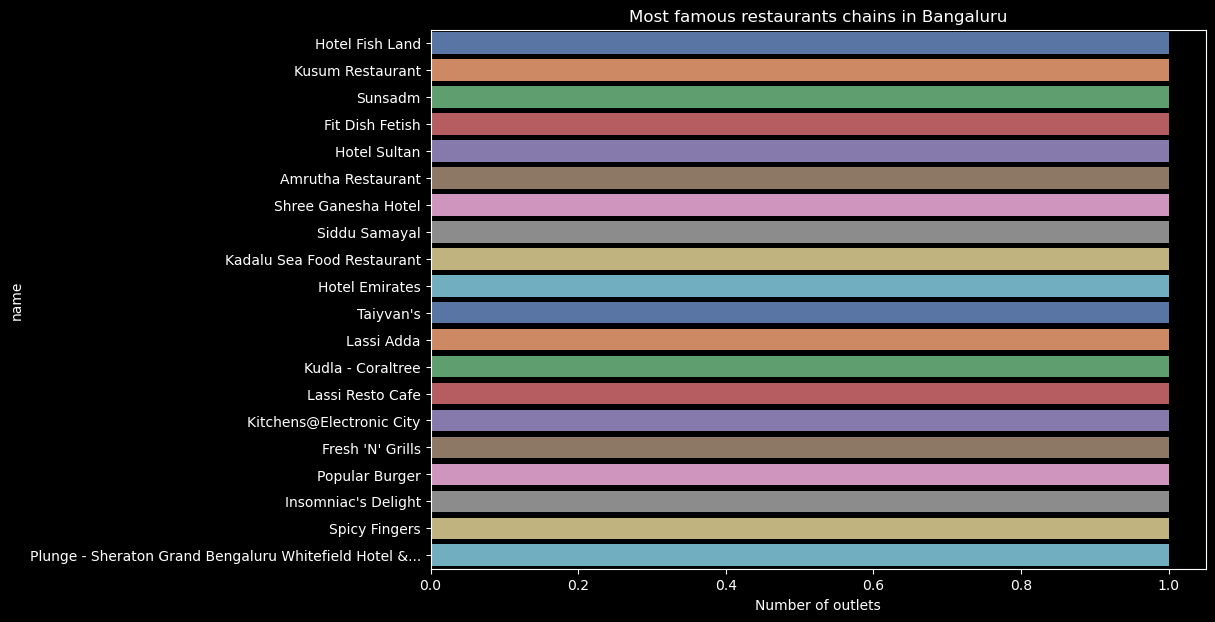

In [128]:
#bottom restaurant chains in Bengalore
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[-20:]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

In [130]:
df.rest.value_counts()

rest
Delivery              25670
Dine-out              17638
Desserts               3564
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

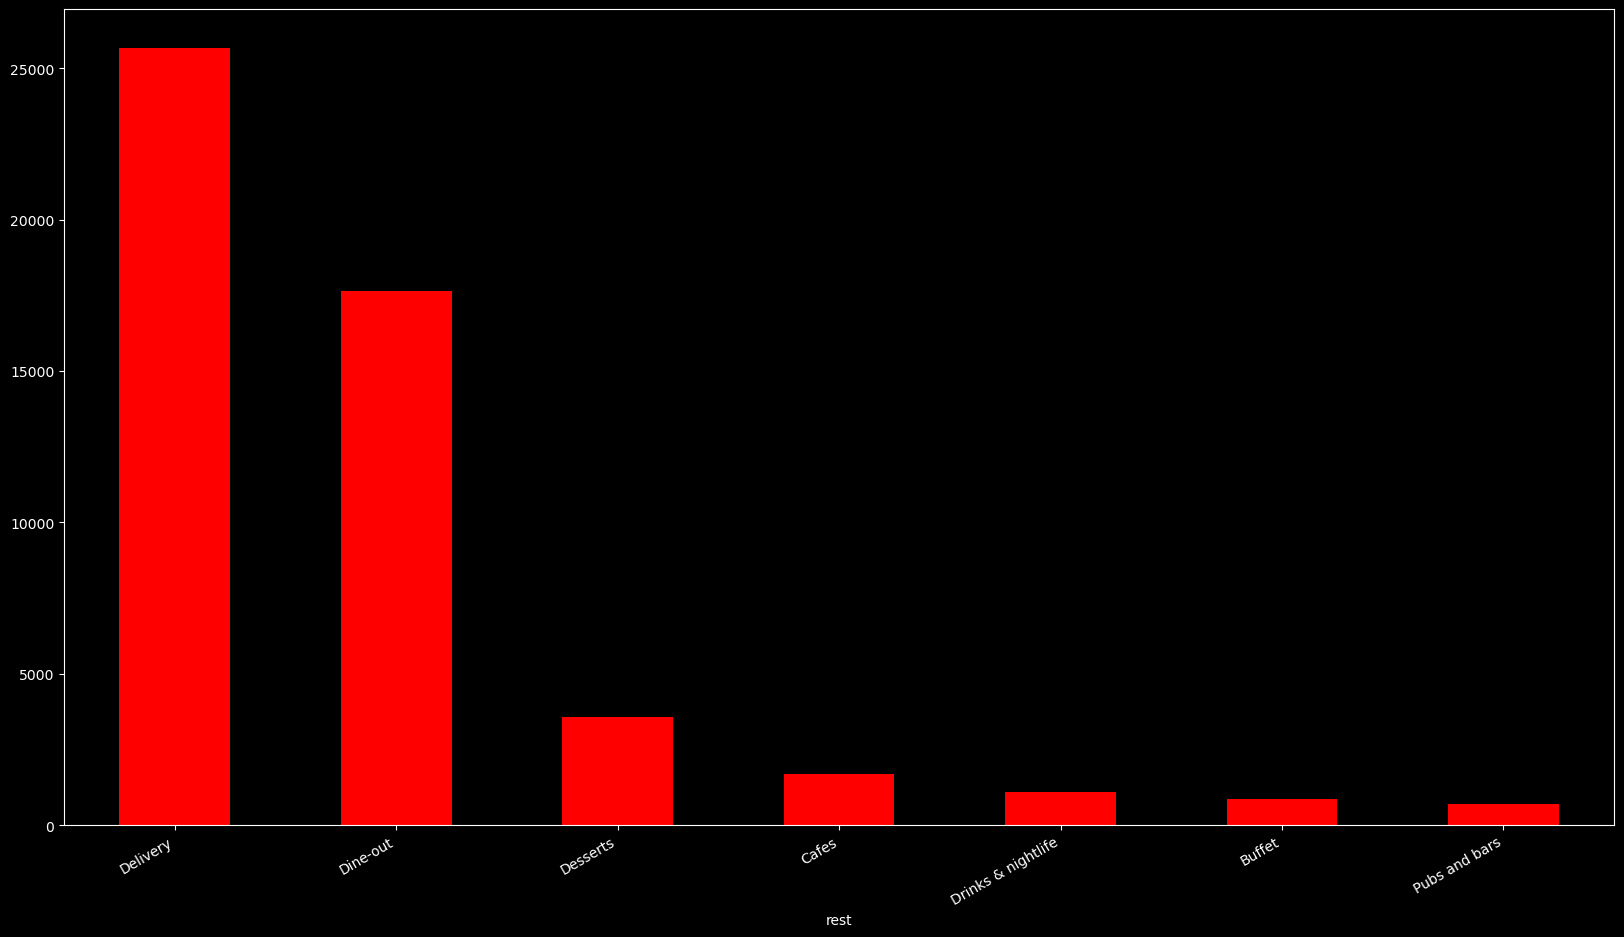

In [129]:
# How many types of restaurants we have?
plt.figure(figsize=(20,12))
df['rest'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()


In [ ]:
#Highest voted restaurant
df.groupby('name')['votes'].max().nlargest(10).plot.bar(color='blue')

In [ ]:
#total restaurant at different locations
df.groupby('location')['name'].unique()

In [ ]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

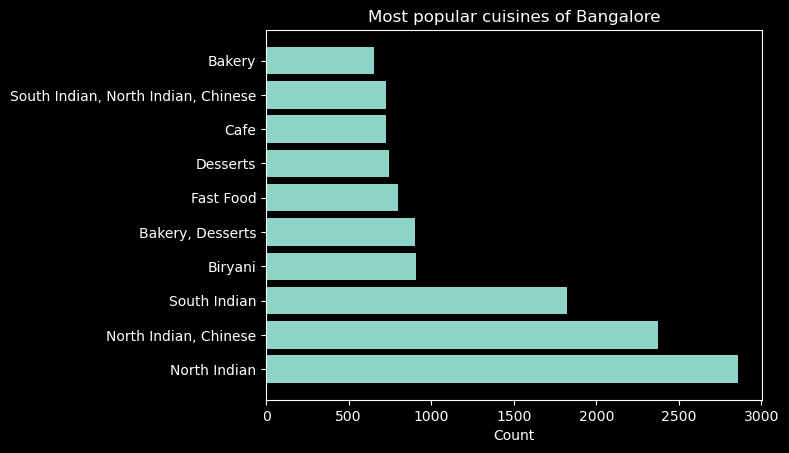

In [131]:
#Total number of variety of restaurants ie north indian,south Indian
cuisines=df['cuisines'].value_counts()[:10]
plt.barh(width=cuisines, y = cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [ ]:
#Cost vs Rating
cuisines.index

In [ ]:
df['Cost2plates'].max()

In [ ]:
#Top 10 Most Expensive restaurant with approx cost for 2 people
df['Cost2plates'].nlargest(10).plot.bar(color='red')

In [ ]:
#Top 10 Cheapest restaurant with approx cost for 2 people
df['Cost2plates'].nsmallest(10).plot.bar(color='red')


In [132]:
data= df.copy()
data.set_index('location',inplace=True)
df_budget=data[data['Cost2plates']<=500].loc[:,('Cost2plates')]
df_budget=df_budget.reset_index()
df_budget.head().tail(10).style.background_gradient(cmap="Wistia")

,location,Cost2plates
0,Banashankari,300.000000
1,Banashankari,500.000000
2,Banashankari,500.000000
3,Banashankari,450.000000
4,Banashankari,300.000000


In [ ]:
#Which are the foodie areas?
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
plt.barh(width=Restaurant_locations,y =Restaurant_locations.index)

In [133]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [134]:
df.columns

Index(['level_0', 'index', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'cuisines', 'Cost2plates', 'rest', 'location'],
      dtype='object')

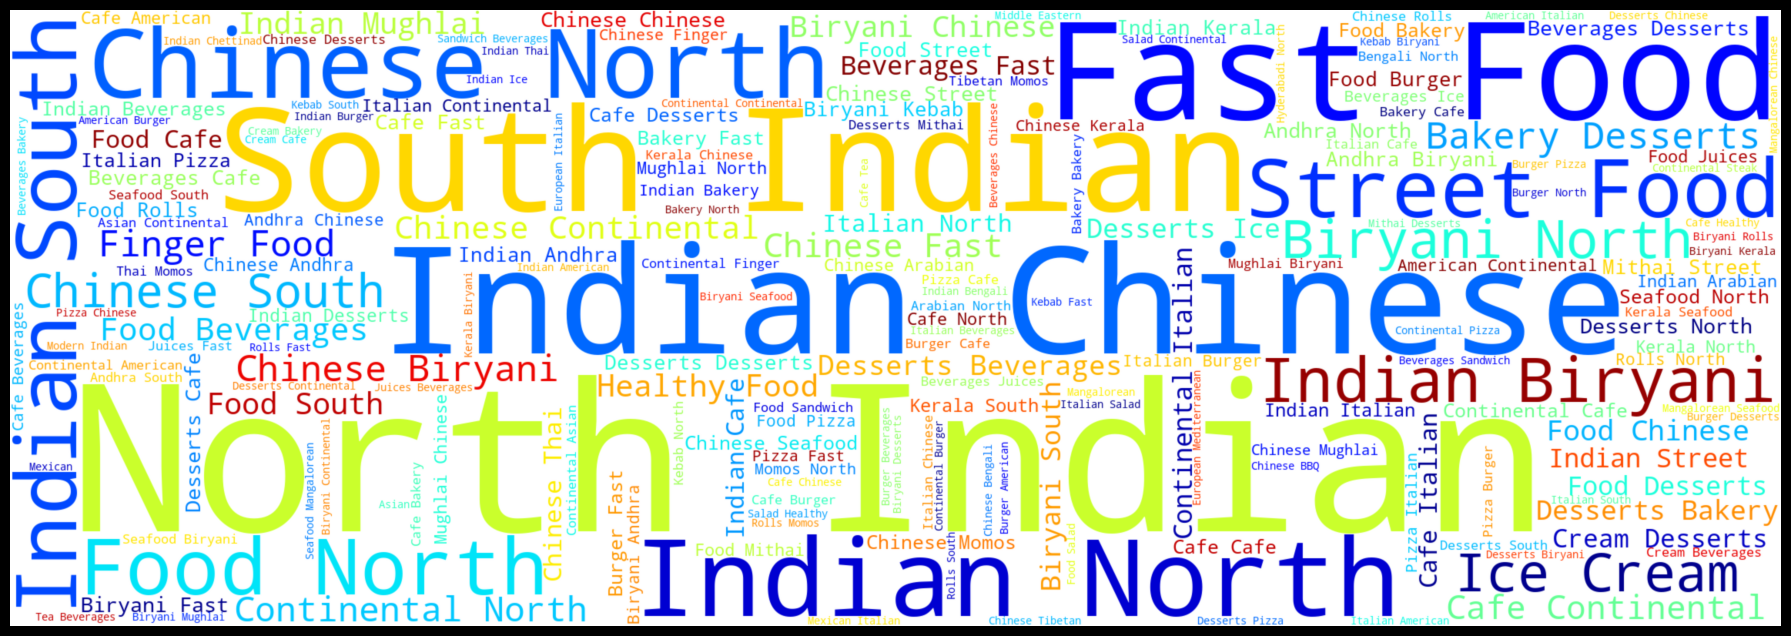

In [135]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(Company for Company in df["cuisines"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 2300,
                       height = 800,
                       colormap = 'jet',
                       background_color = "white").generate(text)
plt.figure(figsize = (50, 8))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()


In [ ]:
df.columns

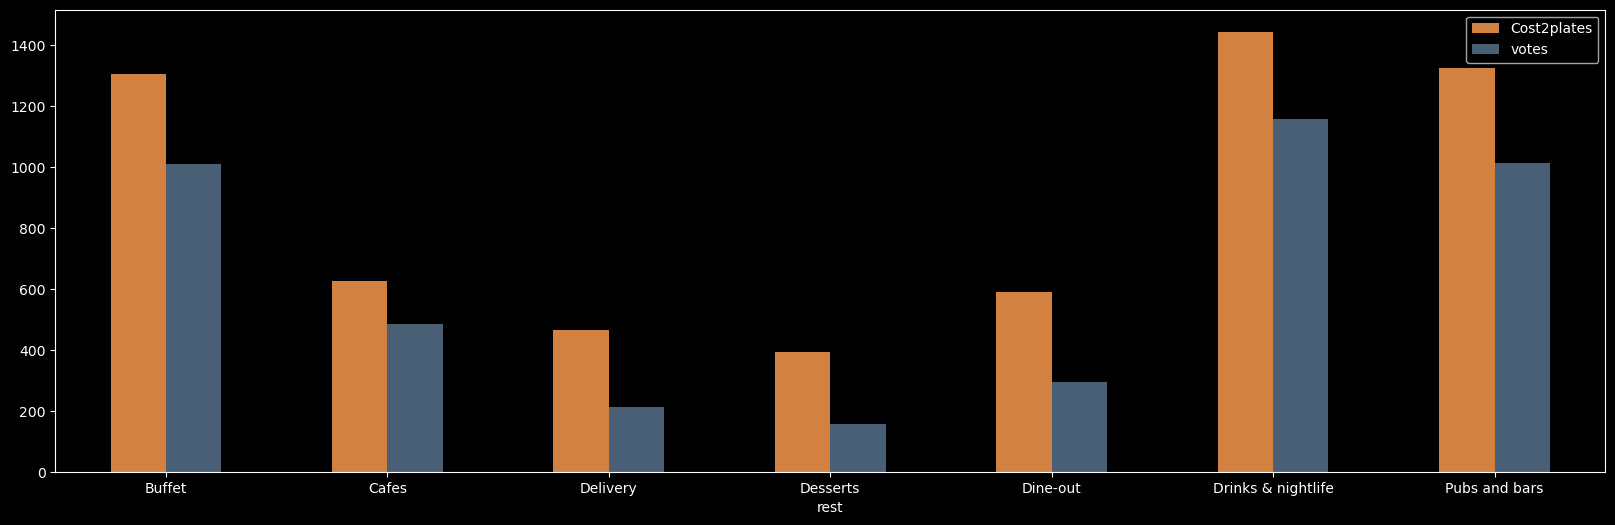

In [136]:
color = ['#D28140','#495F75']
df.groupby(["rest"])[['Cost2plates','votes']].mean().plot(kind="bar",figsize=(20,6),color=color);
plt.xticks(rotation=0);

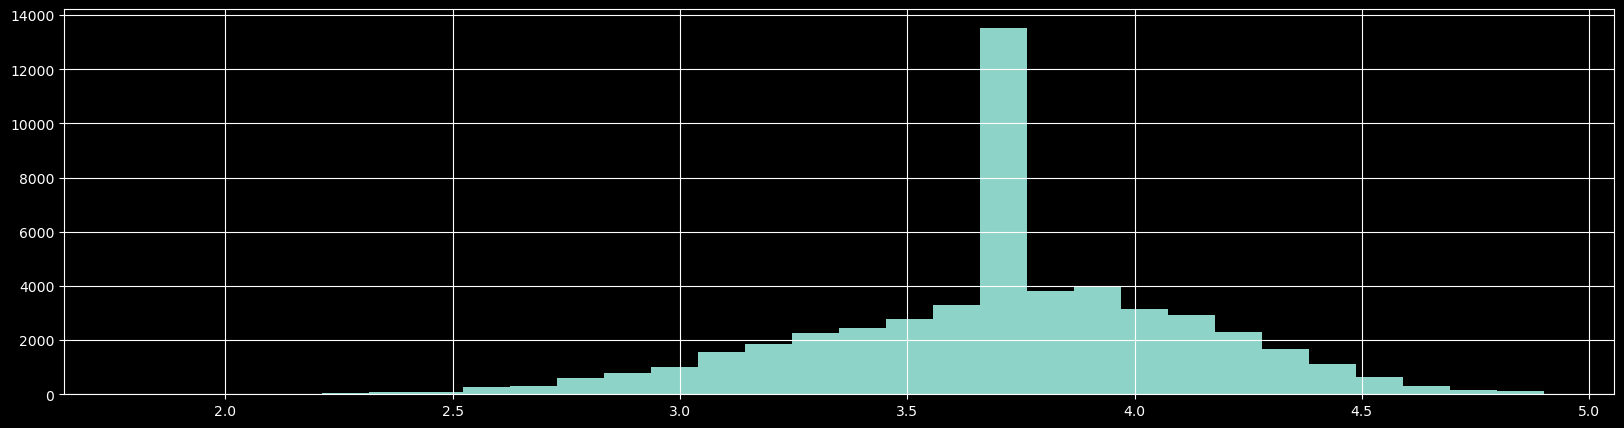

In [137]:
n_bins = 30
plt.figure(figsize = (20, 5))
df["rate"].hist(bins = n_bins);


1) sutaible location 
BTM,Kormangala,Jayanagar
2) what is range of the cost2plate
250 to 750 might go to 1k also
3) shall I have online orders and booking table
yes
4) which type of cuisine
north indian, chinese, south indian -delivery, dine-out

5) rate and votes 
avg rate - 3.5-4.5, votes - above 1K
if rate is increasing you have increased votes
rates and votes hardly affects cost of plate.